```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```

### Module
__KNeighborsRegressor__ Regression based on k-nearest neighbors.

### Goal
Ceate a supervised learning model that use classification methods.

### Tools
1. Pandas
2. scikit-learn
3. KNeighborsRegressor 

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv

In [1]:
import os
import sys

supervised_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
sys.path.append(supervised_dir)
sys.path

['/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised/regression',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised']

In [2]:
import pandas as pd

import functions_regression as freg
from  load_dataset import LoadDataset, SpiType

from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split

## Get the data

In [3]:
load_dataset = LoadDataset()
X, y = load_dataset.return_X_y_regr(spi_type = SpiType.INDICATORS)

columns_names = X.columns

X = scale(X)

### Split dataset into train and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1619, 49) y_train.shape: (1619,)
X_test.shape: (694, 49) y_test.shape: (694,)


## Modeling

#### Building, train and predict model

In [5]:
params = {
   "n_jobs": 8, 
    "algorithm": "auto", 
    "leaf_size": 20, 
    "n_neighbors": 5, 
    "p": 1, 
    "weights": "distance"
}
    
regressor = KNeighborsRegressor(**params)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#### Getting Best Hyperparameter Optimization

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [6]:
from sklearn.model_selection import (GridSearchCV)
import warnings

warnings.filterwarnings("ignore")

parameters = {
    "n_neighbors": [5, 10, 20, 30, 40, 50],
    "weights": ("uniform", "distance"),
    "algorithm": ("auto", "ball_tree", "kd_tree", "brute"),
    "leaf_size": [20, 30, 40, 50, 60],
    "p": [1, 2, 4, 6, 8]
}

gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(scale(X_train), y_train)

print("Tuned Hyperparameters :", gridsearch.best_params_)
print("Best Score:", gridsearch.best_score_)

Tuned Hyperparameters : {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score: 0.4253552130579969


### Predict and show model result

In [7]:
freg.evaluate_model(regressor, X, y, X_train, y_train, X_test, y_test, y_pred)


Model-evaluation
----------------------------------------------------------------------
Score: 1.0000
CV train mean score:0.4294
K-fold CV average score: 0.43
R²: 0.5415
Max Error: 1219.6315
Explained Variance: 0.5422
MSE: 206805.4761
RMSE: 103402.7380
MAE: 376.3301


### Plor Prediction Result

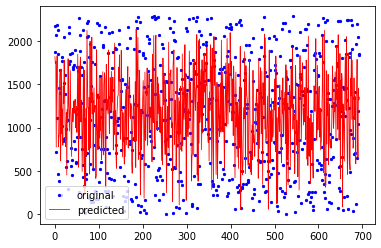

In [8]:
freg.plot_prediction_result(y_test, y_pred)